In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
data = pd.read_csv('poverty.csv')

In [14]:
print(data)

       ind_id                                     ind_definition reportyear  \
0         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
1         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
2         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
3         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
4         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
...       ...                                                ...        ...   
32000     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32001     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32002     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32003     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32004     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   

       race_eth_code race_eth_name geotype  geotype

In [30]:
estimate_by_county = data.loc[data['race_eth_name'] == 'Total'][['estimate', 'county_name']]
estimate_by_county = estimate_by_county.dropna()
avg_est_county = estimate_by_county.groupby('county_name').mean()

top10_est_county = avg_est_county.sort_values(by=['estimate'], ascending=False).head(10)
print(top10_est_county)

Text(0.5, 1.0, 'top 10 county with respective estimated poverty percentage')

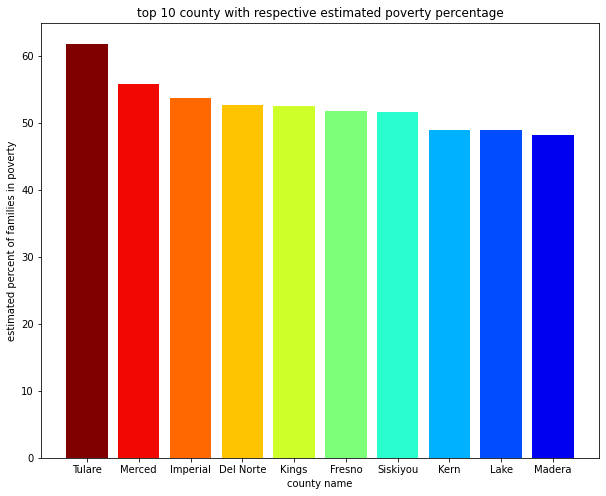

In [57]:
plt.figure(figsize=(10, 8))

x = list(top10_est_county.index)
y = top10_est_county['estimate']
for i in range(len(x)):
    plt.bar(x[i], y[i], color=cm.jet(1. * (len(x) - i) / len(x)))
    
plt.xlabel('county name')
plt.ylabel('estimated percent of families in poverty')
plt.title('top 10 county with respective estimated poverty percentage')

In [58]:
estimate_by_race = data[['estimate', 'race_eth_name']]
estimate_by_race = estimate_by_race.dropna()
avg_est_race = estimate_by_race.groupby('race_eth_name').mean()

# top10_est_county = avg_est_county.sort_values(by=['estimate'], ascending=False).head(10)
print(avg_est_race)

                estimate
race_eth_name           
AIAN           56.243495
AfricanAm      47.645574
Asian          27.753202
Latino         49.722367
Multiple       30.987263
NHOPI          57.114103
Other          50.491672
Total          36.837857
White          25.433010


Text(0.5, 1.0, 'percentage of families in poverty over different races')

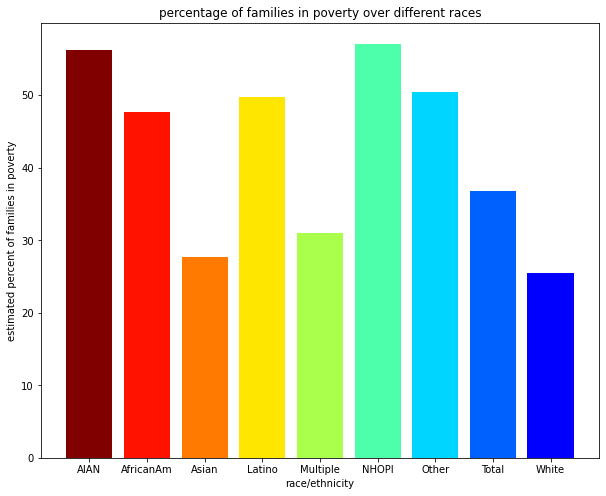

In [60]:
plt.figure(figsize=(10, 8))

x = list(avg_est_race.index)
y = avg_est_race['estimate']
for i in range(len(x)):
    plt.bar(x[i], y[i], color=cm.jet(1. * (len(x) - i) / len(x)))
    
plt.xlabel('race/ethnicity')
plt.ylabel('estimated percent of families in poverty')
plt.title('percentage of families in poverty over different races')